## Goal: to explore data to guide future analysis
##### Intended Result: come away with some ideas to dive deeper into using more advanced methods



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
df = pd.read_csv('clean_crime_data.csv')

#### lets check out the top 20 most frequently reported types of crimes

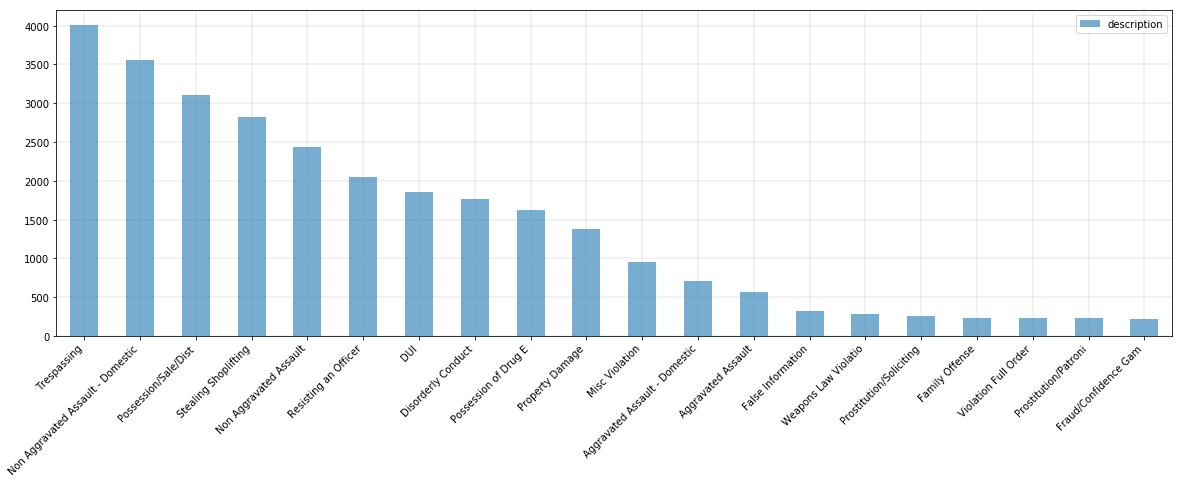

In [3]:
top_crimes = pd.DataFrame(df.description.value_counts()).iloc[0:20]

def simpleBarPlot(df):
    df.plot(kind = 'bar', alpha = .6, figsize = [20,6])
    plt.xticks(np.arange(len(df)), rotation=45, ha='right')
    plt.grid(color='gray', linestyle='-', linewidth=2, alpha = .1)

simpleBarPlot(top_crimes)

#### what about the top 20 crimes that people get arrested for most?

In [4]:
df.head()

,crime_id,from_date,description,zip_code,charge_id,dvflag,firearm_used_flag,arr,male_arr,female_arr,...,age_18_24,age_25_29,age_30_34,age_35_39,age_40_44,age_45_49,age_50_plus,total_vic,male_vic,male_vic.1
0,100034831_134,10/18/2016,Stolen Property,64130,134,0,0,1,1,0,...,0,1,0,0,0,0,0,0.0,0.0,0.0
1,130056370_946,7/3/2016,Possession/Sale/Dist,64133,946,0,0,1,1,0,...,0,0,0,0,0,0,1,0.0,0.0,0.0
2,140071459_134,3/26/2016,Stolen Property,64130,134,0,0,1,1,0,...,0,1,0,0,0,0,0,1.0,1.0,0.0
3,150064182_946,08/26/2018,Possession/Sale/Dist,64157,946,0,0,1,1,0,...,0,0,0,0,0,1,0,0.0,0.0,0.0
4,150082191_946,10/18/2017,Possession/Sale/Dist,64105,946,0,0,1,1,0,...,1,0,0,0,0,0,0,0.0,0.0,0.0


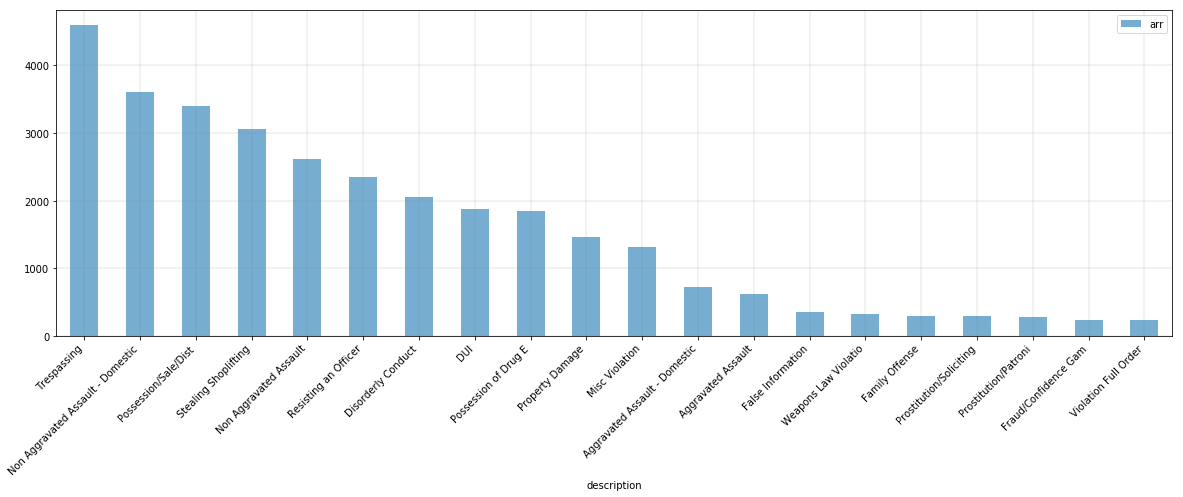

In [5]:
simpleBarPlot(df[['description',
                  'arr']].groupby('description').sum().sort_values('arr',
                                                                        ascending = False).iloc[0:20])

#### What kinds of crimes involve the most amounts of guns?

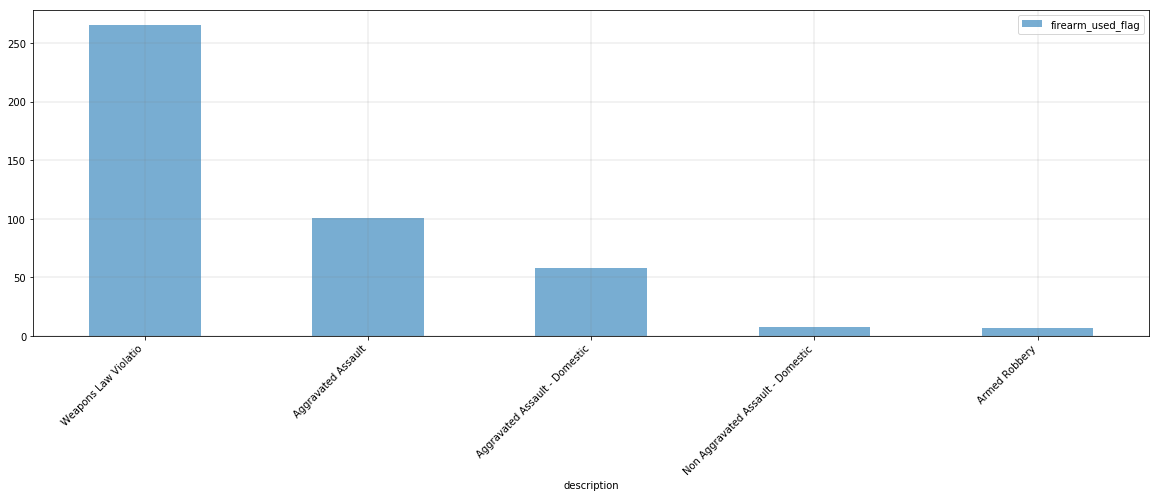

In [6]:
simpleBarPlot(df[['description',
                  'firearm_used_flag']].groupby('description').sum().sort_values('firearm_used_flag',
                                                                                 ascending = False).iloc[0:5])

Weapons laws violations involve guns the most often... suprising... This might be cool to do a regression on later

#### Lets look at the top 10 crimes by age

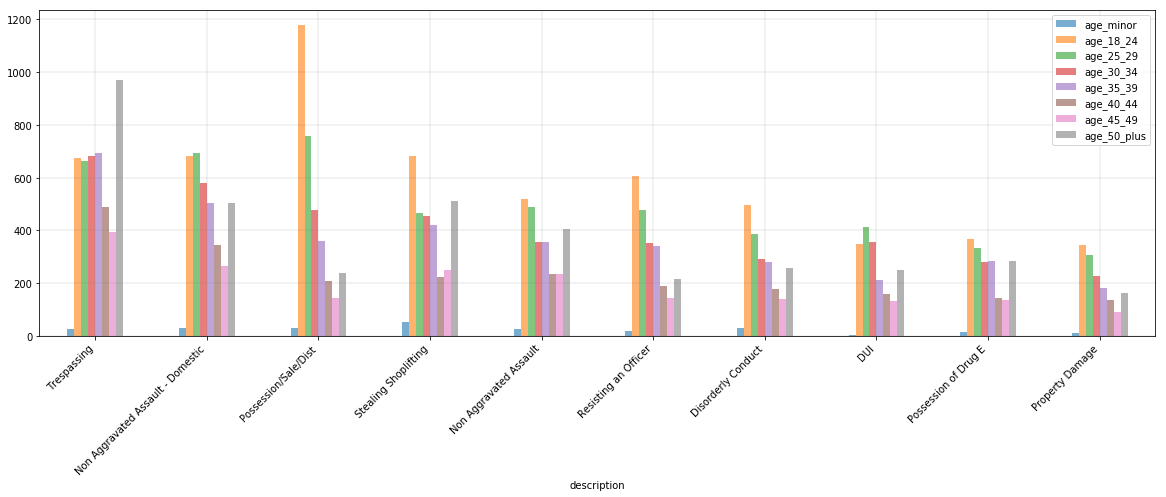

In [7]:
age_arr = df[['description','arr', 'age_minor','age_18_24', 'age_25_29', 'age_30_34',
       'age_35_39', 'age_40_44', 'age_45_49', 'age_50_plus']].groupby('description').sum().sort_values('arr',
                                                                                 ascending = False).iloc[0:10]
age_arr.drop(columns=['arr'],inplace = True)

simpleBarPlot(age_arr)

So it seems like younger people are getting arrested for drugs more often, but its very intresting that people 50 or above are getting arrested for trespassing and stealing. DUI's arrests drop almost by half at age 35.

#### Lets see if there are any discripencies in the reported race of people being arrested

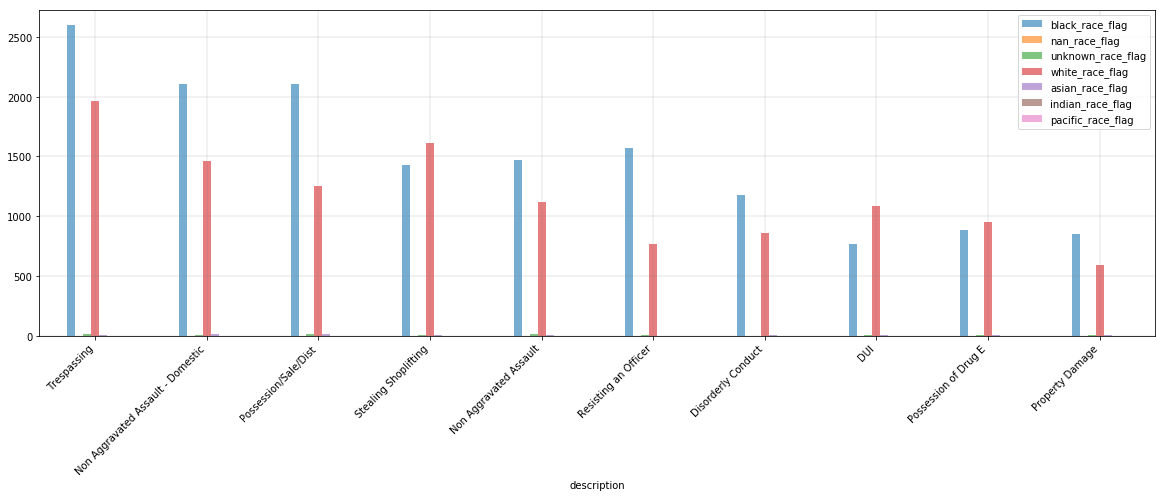

In [8]:
race_arr = df[['description','arr','black_race_flag', 'nan_race_flag', 'unknown_race_flag','white_race_flag', 
              'asian_race_flag', 'indian_race_flag',
              'pacific_race_flag']].groupby('description').sum().sort_values('arr',
                                                                                 ascending = False).iloc[0:10]
race_arr.drop(columns=['arr'],inplace = True)

simpleBarPlot(race_arr)

#### What about crimes over time? 

In [9]:
def simpleLineGraph(df):
    df.plot(kind = 'line', alpha = .6, figsize = [20,6], color = 'r')
    plt.grid(color='gray', linestyle='-', linewidth=2, alpha = .1)

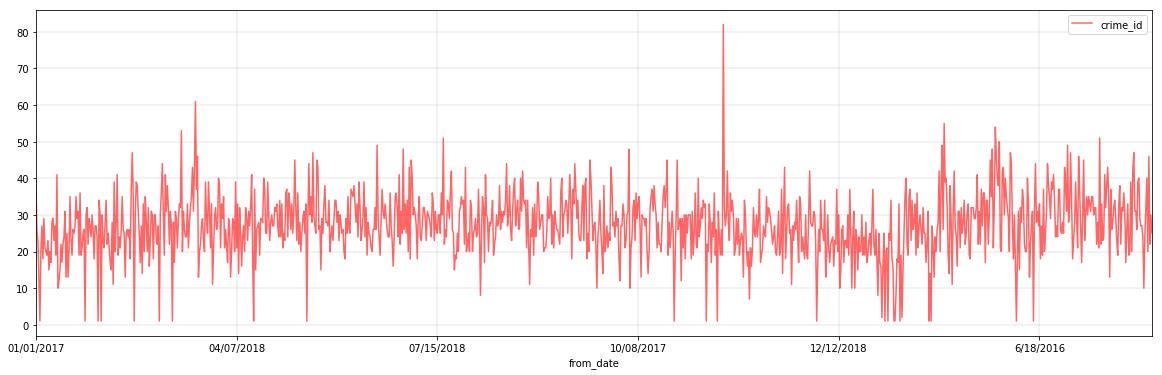

In [10]:
simpleLineGraph(df[['crime_id','from_date']].groupby('from_date').agg({'crime_id': 'nunique'}))

wow that looks crazy! I wonder if there is some time-series decomposition we can do later on? (hint: there is)

#### Lets look at the top 10 crimes being reported over time, I wonder if it looks like certian things will rise together?

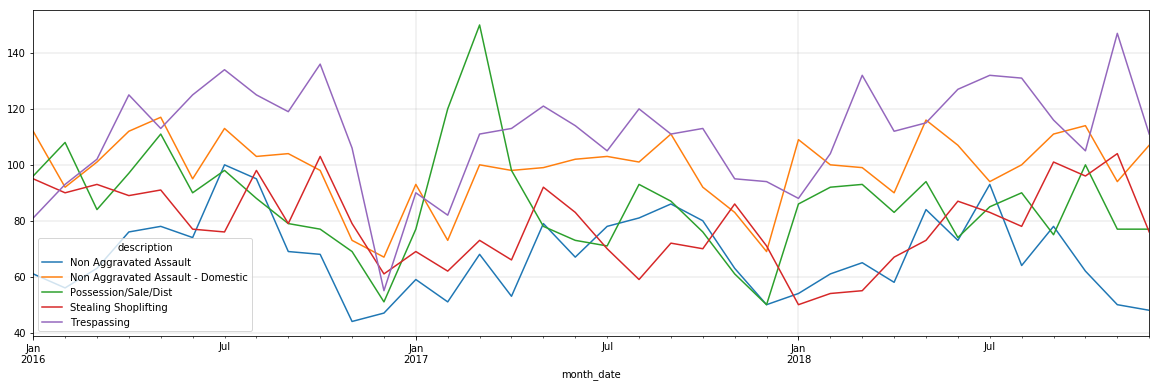

In [11]:
import warnings
warnings.simplefilter('ignore') # getting a warning that I dont think is valid, going to ignore

# move from long to wide data for this plot 
ts_df = df[df.description.isin(age_arr.index.unique()[:5])]

ts_df.from_date = pd.to_datetime(ts_df.from_date)

ts_df['month_date'] = ts_df.from_date.dt.to_period('M')

ts_df.drop(columns = ['from_date'], inplace = True)


ts_df = ts_df[['crime_id',
               'month_date',
               'description']].groupby(['month_date','description']).agg({'crime_id': 'nunique'}).reset_index()

ts_df = ts_df.pivot(index='month_date', columns='description', values='crime_id')

ts_df.fillna(0, inplace = True)


ts_df[4:].plot(figsize = [20,6])
plt.grid(color='gray', linestyle='-', linewidth=2, alpha = .1)